In [15]:
%matplotlib inline
import torch
from sebm.ebm_sgld import SGLD_sampler
from sebm.models import EBM

device = torch.device('cuda:0')
data_noise_std = 3e-2
sgld_noise_std = 7.5e-3
sgld_num_steps = 50
reg_alpha = 1e-2
activation = 'Swish'
buffer_init = True
buffer_dup_allowed = True
load_version = 'ebm-dataset=mnist-seed=1-lr=0.0001-latentdim=1-data_noise_std=%s-sgld_noise_std=%s-sgld_lr=2.0-sgld_num_steps=%s-buffer_size=5000-buffer_percent=0.95-buffer_init=%s-dup_allowed=%s-reg_alpha=%s-act=%s-arch=simplenet' % (data_noise_std, sgld_noise_std, sgld_num_steps, buffer_init, buffer_dup_allowed, reg_alpha, activation)

print('Init EBM..')
ebm = EBM(arch='simplenet',
              im_height=28, 
              im_width=28, 
              input_channels=1, 
              channels=[64,64,32,32], 
              kernels=[3,4,4,4], 
              strides=[1,2,2,2], 
              paddings=[1,1,1,1], 
              hidden_dim=[128],
              latent_dim=1,
              activation=activation)
ebm = ebm.cuda().to(device)
print('Loading trained weights..')
# ebm.load_state_dict(torch.load('../weights/ebm-%s' % load_version))
ebm.load_state_dict(torch.load('../weights/checkpoint-%s' % load_version)['model_state_dict'])

Init EBM..
Loading trained weights..


<All keys matched successfully>

In [23]:
torch.randn(1).item() > 2
1/0

ZeroDivisionError: division by zero

In [18]:
print('Init sgld sampler..')
sgld_sampler = SGLD_sampler(device=device,
                            noise_std=1e-3,
                            lr=1.0,
                            pixel_size=28,
                            buffer_size=1000,
                            buffer_percent=0.95,
                            buffer_init=False,
                            buffer_dup_allowed=False)
test_batch_size = 50
images_ebm = sgld_sampler.sample(ebm=ebm, 
                                 batch_size=test_batch_size, 
                                 num_steps=1000,
                                 pcd=False)

Init sgld sampler..


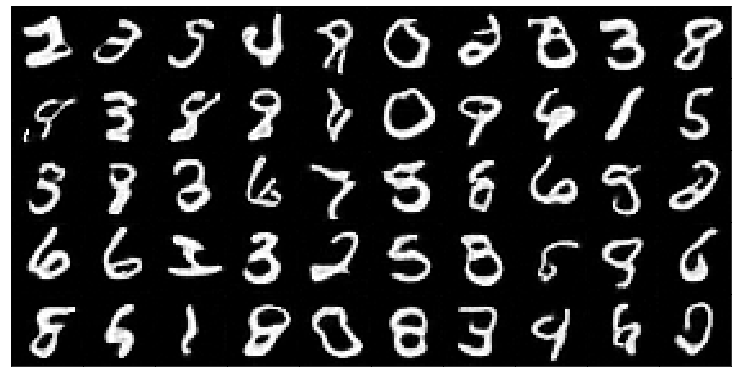

In [19]:
from sebm.util import plot_samples
plot_samples(images_ebm)